<a href="https://colab.research.google.com/github/JeanFirmino/ESTUDO-SOBRE-A-RELACAO-IBOV-DOLAR/blob/main/ESTUDO_SOBRE_A_RELA%C3%87%C3%83O_ENTRE_USD_BRL_COM_O_INDICE_IBOVESPA_COM_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Foi utilizado a série histórica do indice ibovespa com 10 anos de história.
# Buscou-se como meta analizar a variação do indice ibovespa e a variação do USD/BRL
# Caso se confirme alguma relação, será aplicado o algoritmo de árvore de decisão para uma possivel previsão

### Analise para os dados IBOVESPA e USD/BRL



Importando bibliotecas

In [ ]:
# Iniciando as bibliotecas usadas para montar um sistema de aprendizado de máquina, conhecido como "árvore de decisão",
# Tem como objetivo criar um "raciocínio" das informações de saída e entrada para que possa fornecer um método no qual seja possivel prever informações.
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Os dados foram coletados do site Br investing, teve como critério principal coletar os dados diários entre 01/01/2010 até 01/12/2020
origem = 'drive/My Drive/Artigo_IBOVESPA_relação/dadosprontosibovdolar.csv'
planilha = pd.read_csv(origem, sep=',')
plt.style.use('classic')

In [ ]:
planilha.head()

,ano,meses,dia,fechamentoibov,aberturaibov,maxibov,minibov,volibov,aberturausd,maxusd,minusd,fechamentousd,volusd
0,2010,1,4,70045.0,68587.0,70081.0,68587.0,1655400.0,1.6930,1.7412,1.6723,1.7190,0.0
1,2010,1,5,70240.0,70046.0,70595.0,69928.0,1984200.0,1.6713,1.7370,1.6713,1.7370,0.0
2,2010,1,6,70729.0,70237.0,70937.0,70016.0,2243600.0,1.6798,1.7359,1.6798,1.7315,0.0
3,2010,1,7,70451.0,70723.0,70723.0,70045.0,1555000.0,1.7242,1.7472,1.6805,1.7389,0.0
4,2010,1,8,70263.0,70455.0,70766.0,70158.0,1634400.0,1.6954,1.7492,1.6954,1.7320,0.0


In [ ]:
dados = planilha.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)

In [ ]:
dados['ano'] = dados['ano'].astype(int)
dados['meses'] = dados['meses'].astype(int)
dados['dia'] = dados['dia'].astype(int) # para converter as datas para inteiro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
dados.head()

,ano,meses,dia,fechamentoibov,aberturaibov,maxibov,minibov,volibov,aberturausd,maxusd,minusd,fechamentousd,volusd
0,2010,1,4,70045.0,68587.0,70081.0,68587.0,1655400.0,1.6930,1.7412,1.6723,1.7190,0.0
1,2010,1,5,70240.0,70046.0,70595.0,69928.0,1984200.0,1.6713,1.7370,1.6713,1.7370,0.0
2,2010,1,6,70729.0,70237.0,70937.0,70016.0,2243600.0,1.6798,1.7359,1.6798,1.7315,0.0
3,2010,1,7,70451.0,70723.0,70723.0,70045.0,1555000.0,1.7242,1.7472,1.6805,1.7389,0.0
4,2010,1,8,70263.0,70455.0,70766.0,70158.0,1634400.0,1.6954,1.7492,1.6954,1.7320,0.0


In [ ]:
dados.shape #Número de linhas e colunas no dataframe

(2690, 13)

In [ ]:
dados.info() # Informações base do dataframe (se alguma coluna numérica estiver em object, por favor converta )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2690 entries, 0 to 2707
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             2690 non-null   int64  
 1   meses           2690 non-null   int64  
 2   dia             2690 non-null   int64  
 3   fechamentoibov  2690 non-null   float64
 4   aberturaibov    2690 non-null   float64
 5   maxibov         2690 non-null   float64
 6   minibov         2690 non-null   float64
 7   volibov         2690 non-null   float64
 8   aberturausd     2690 non-null   float64
 9   maxusd          2690 non-null   float64
 10  minusd          2690 non-null   float64
 11  fechamentousd   2690 non-null   float64
 12  volusd          2690 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 294.2 KB


In [ ]:
dados["fechamentoibov"].value_counts().sort_index()

37497.0     1
37645.0     1
37717.0     1
37937.0     1
38031.0     1
           ..
118391.0    1
118478.0    1
118573.0    1
118862.0    1
119528.0    1
Name: fechamentoibov, Length: 2601, dtype: int64

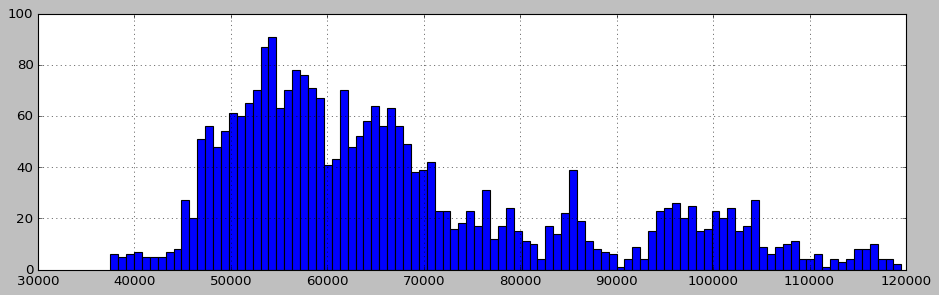

In [ ]:
dados["fechamentoibov"].hist(bins = 100, figsize = (14,4))

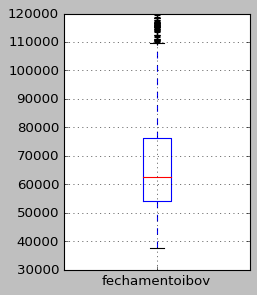

In [ ]:
dados.boxplot(figsize=(3, 4),column=['fechamentoibov'])

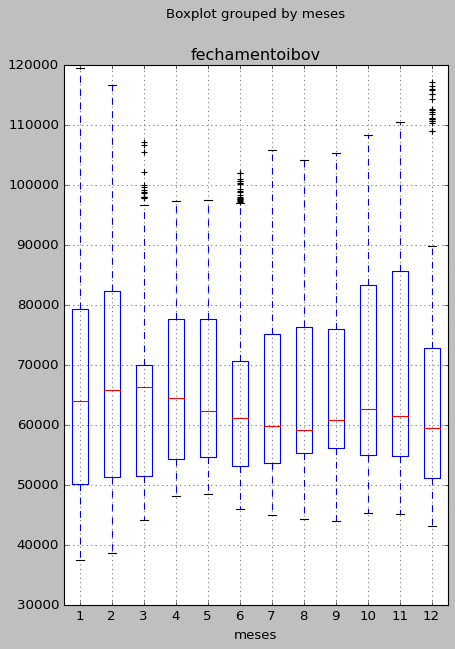

In [ ]:
dados.boxplot(figsize=(6, 9),column=['fechamentoibov'],by = 'meses')

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xticks(fontsize = 16)
    plt.legend()
    plt.xlabel("Time")
    plt.yticks(fontsize = 16)
    plt.ylabel("Value")
    plt.grid(True)    

No handles with labels found to put in legend.


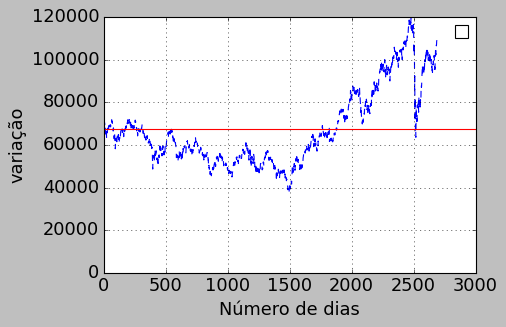

In [ ]:
plt.figure(figsize=(6, 4))
plot_series(np.linspace(1,len(dados),len(dados)),dados.fechamentoibov,'--')
plt.xlabel("Número de dias", fontsize = 16)
plt.ylabel("variação", fontsize = 16)
plt.ylim(-100,)
plt.axhline(y=dados.fechamentoibov.mean(), c = 'r')

In [ ]:
dados["fechamentoibov"].mean() # média simples

67481.35836431227

In [ ]:
dados["fechamentoibov"].std() # Retorna o desvio padrão da amostra sobre o eixo solicitado

17991.333444981225

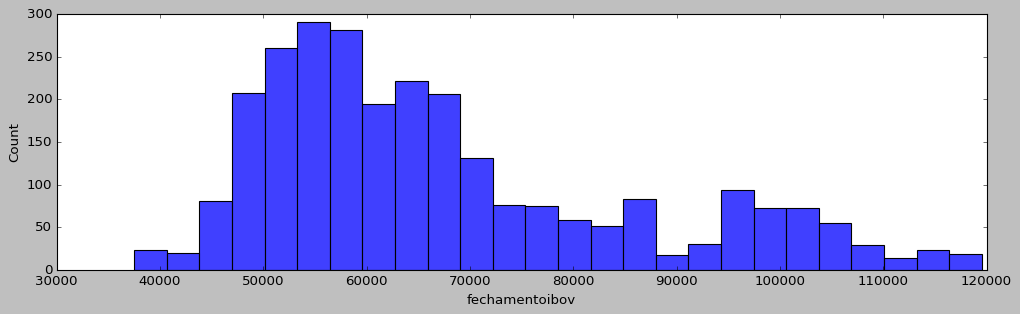

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(dados, x = "fechamentoibov")

Aplicando o teste de correlação

In [ ]:
dados.columns.values

array(['ano', 'meses', 'dia', 'fechamentoibov', 'aberturaibov', 'maxibov',
       'minibov', 'volibov', 'aberturausd', 'maxusd', 'minusd',
       'fechamentousd', 'volusd'], dtype=object)

In [ ]:
dadostestes = ['ano', 'meses', 'dia', 'fechamentoibov', 'aberturaibov', 'maxibov',
               'minibov', 'volibov', 'aberturausd', 'maxusd', 'minusd',
               'fechamentousd', 'volusd']
dadostestes = dados[dadostestes]

<Figure size 800x800 with 0 Axes>

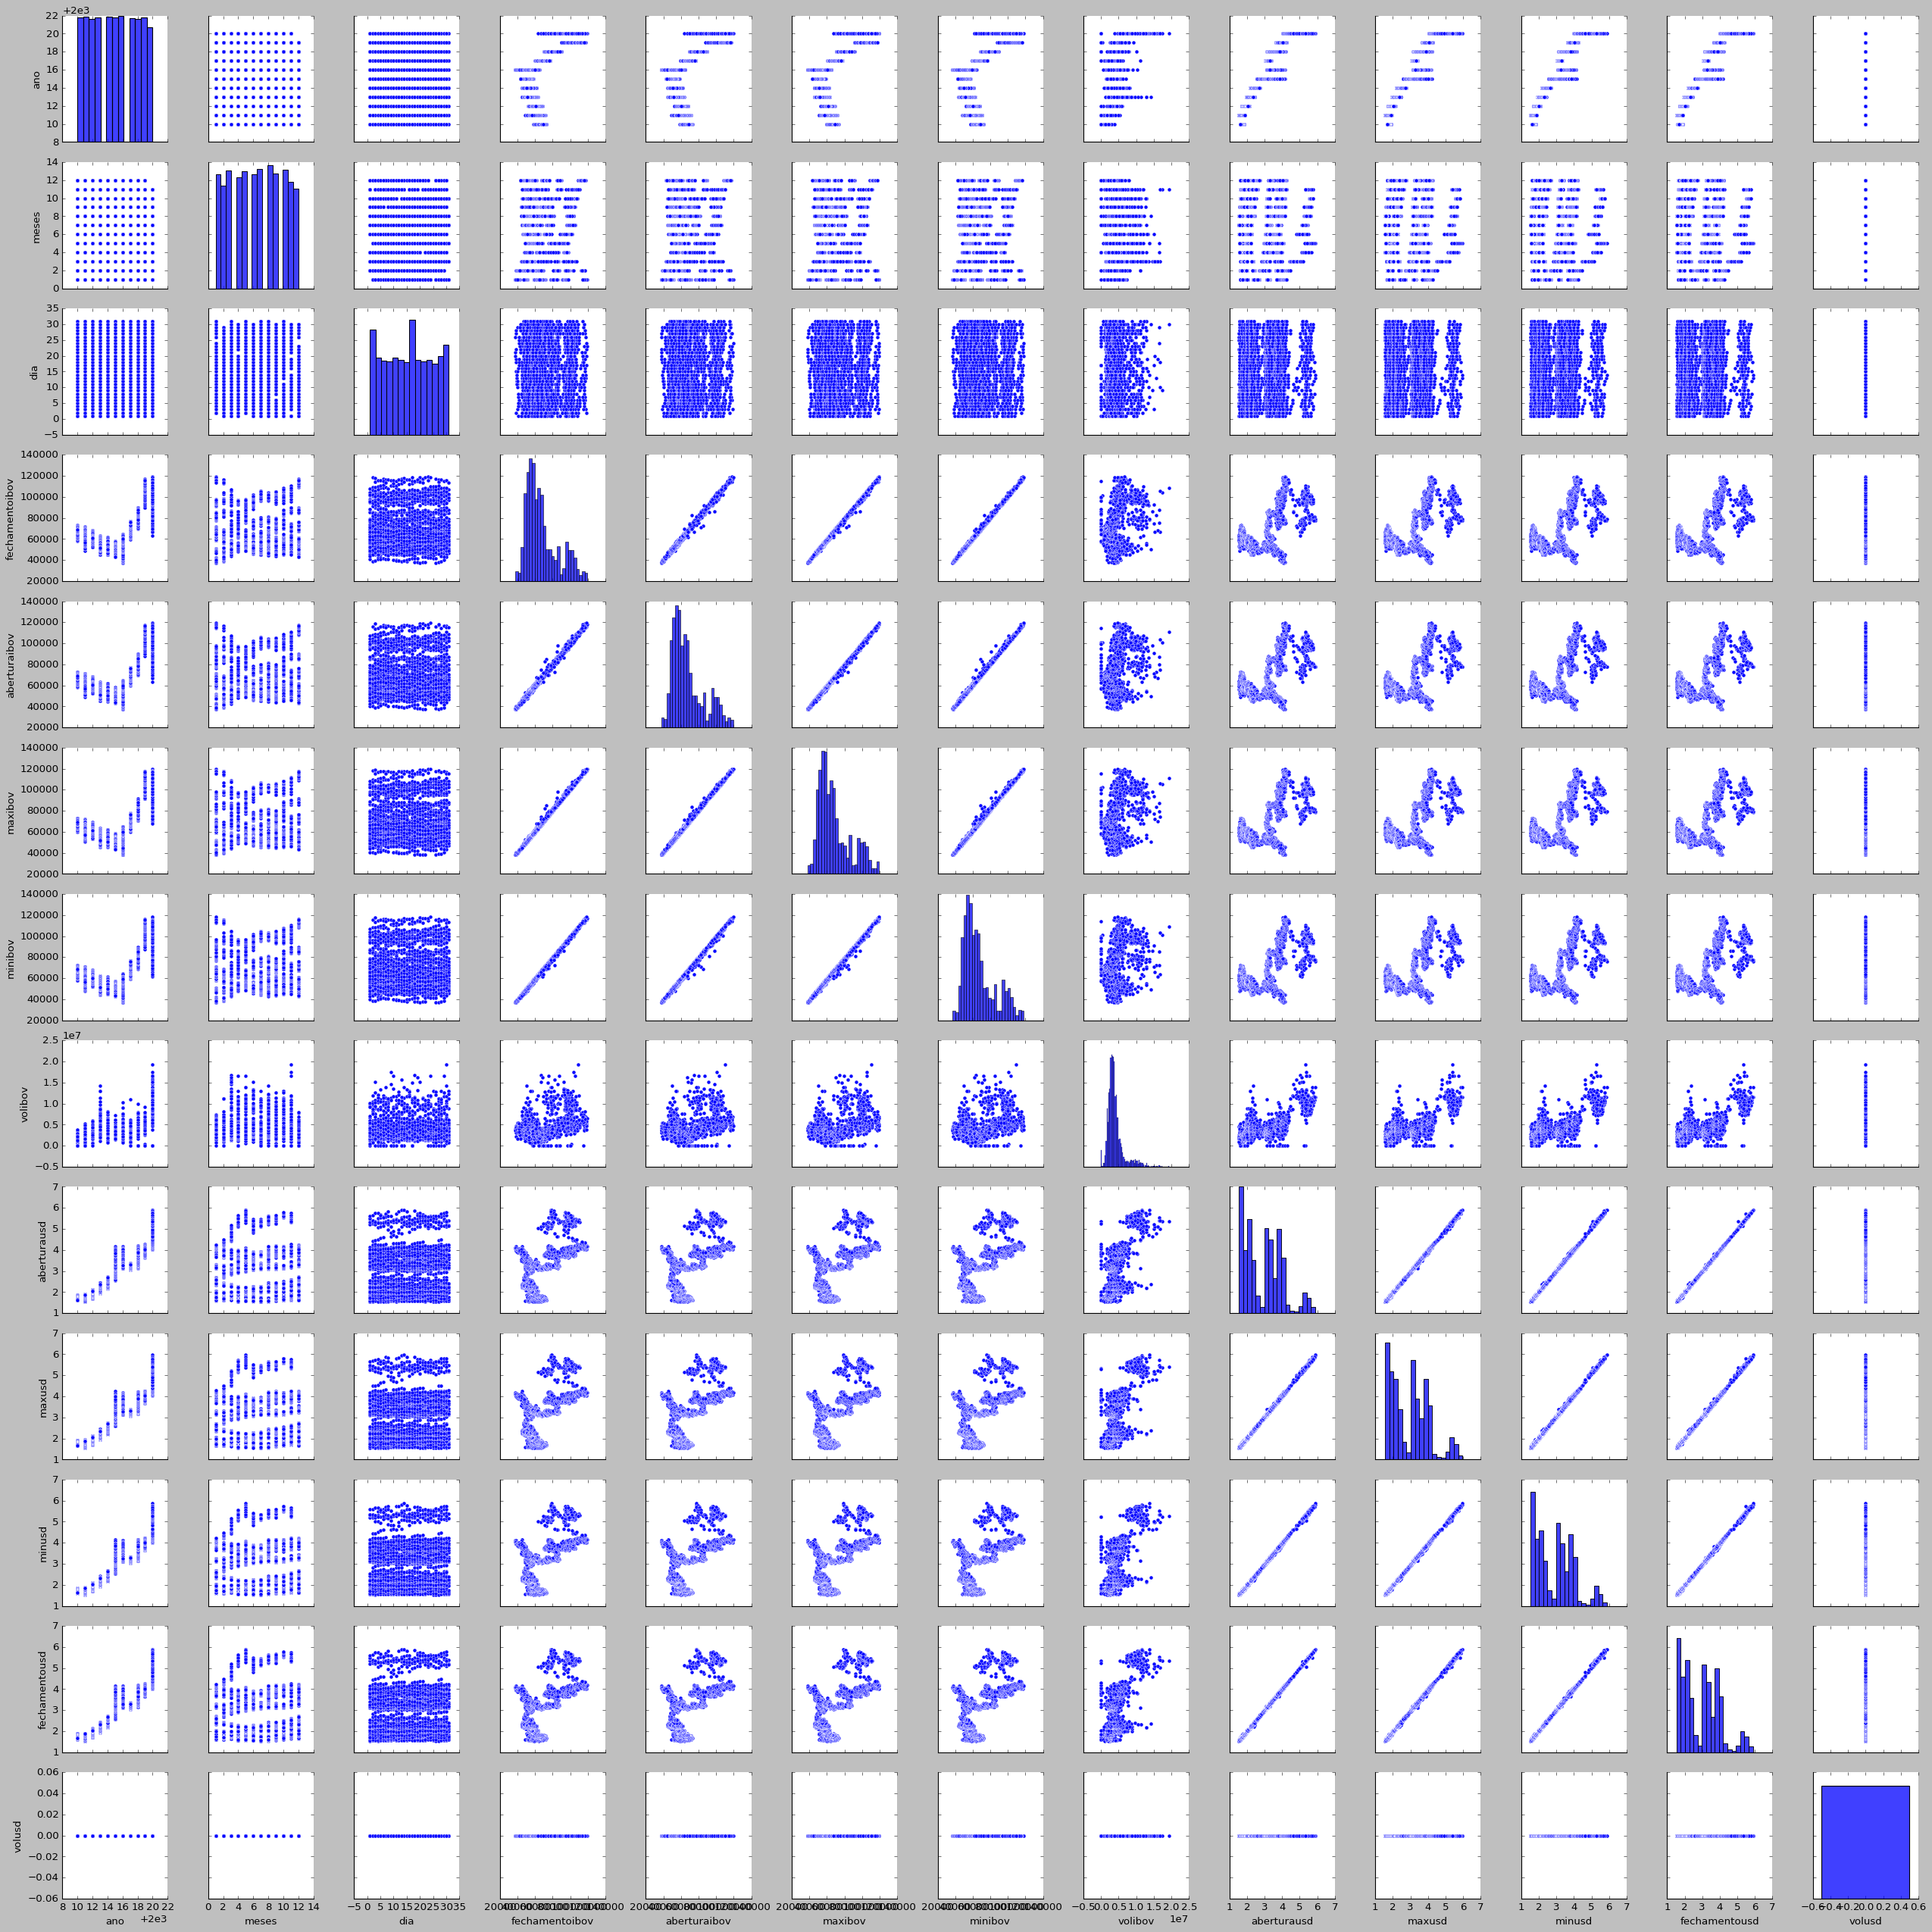

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(dadostestes)

In [ ]:
correlacao = dadostestes.corr()
correlacao

,ano,meses,dia,fechamentoibov,aberturaibov,maxibov,minibov,volibov,aberturausd,maxusd,minusd,fechamentousd,volusd
ano,1.000000,-0.023044,0.001487,0.632485,0.631703,0.635927,0.628831,0.570239,0.926886,0.923787,0.927906,0.925077,NaN
meses,-0.023044,1.000000,-0.002082,0.016749,0.015796,0.015763,0.017823,0.018380,0.076315,0.075730,0.075457,0.075995,NaN
dia,0.001487,-0.002082,1.000000,-0.000632,0.000488,-0.001621,0.000876,0.001606,0.011991,0.012056,0.012501,0.012213,NaN
fechamentoibov,0.632485,0.016749,-0.000632,1.000000,0.998124,0.999145,0.999355,0.383317,0.565584,0.565855,0.568260,0.568743,NaN
aberturaibov,0.631703,0.015796,0.000488,0.998124,1.000000,0.999229,0.998814,0.383629,0.564179,0.564969,0.567196,0.567346,NaN
maxibov,0.635927,0.015763,-0.001621,0.999145,0.999229,1.000000,0.998821,0.395673,0.570532,0.571107,0.573247,0.573689,NaN
minibov,0.628831,0.017823,0.000876,0.999355,0.998814,0.998821,1.000000,0.371428,0.559976,0.560246,0.562819,0.563143,NaN
volibov,0.570239,0.018380,0.001606,0.383317,0.383629,0.395673,0.371428,1.000000,0.657435,0.658482,0.653919,0.656071,NaN
aberturausd,0.926886,0.076315,0.011991,0.565584,0.564179,0.570532,0.559976,0.657435,1.000000,0.999723,0.999823,0.999834,NaN
maxusd,0.923787,0.075730,0.012056,0.565855,0.564969,0.571107,0.560246,0.658482,0.999723,1.000000,0.999743,0.999738,NaN


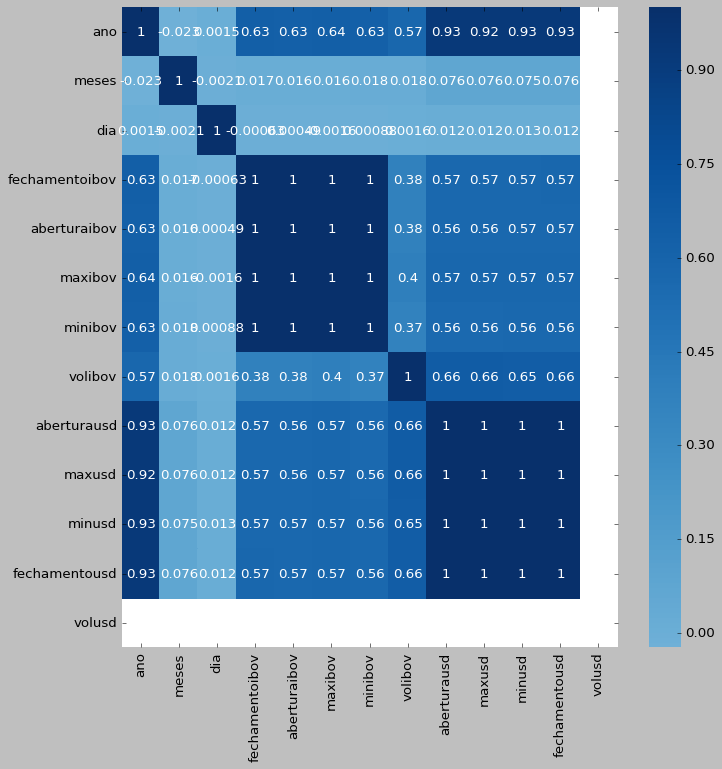

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

Pela matriz de confusão podemos ver que os dados de abertura, máxima, mínima do IBOVESPA do pregão anterior possuí alta relação com o valor de fechamento do pregão seguinte a esses dados, vale lembrar também uma relação de 57% com os dados aber,min,max e fechamento com o preço do dólar do pregão anterior. Outro ponto interessante que pode gerar futuras análises podem ser a relação entre a abertura, min, max e fechamento do dolar com o ano. Além dessa análise, pode-se estudar futuramente a relação entre o ibov e o usd para o mesmo dia.

Normalizando os dados de fechamento

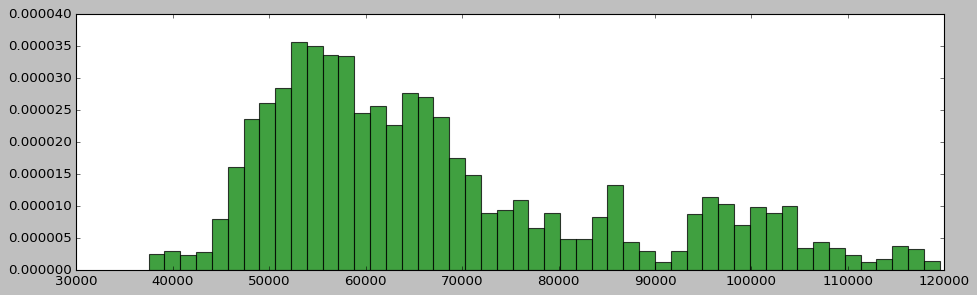

Média dos valores normalizados 10.949689744527937
Desvio Padrão dos valores normalizados 0.13072123212797096


In [ ]:
series = dados.fechamentoibov
plt.figure(figsize=(14,4))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()
iteração = np.linspace(1,len(dados),len(dados))
percent_train = .7
divisao = int(percent_train*len(dados))
ln_series = np.log(series+1)
x_train = ln_series[:divisao]
xm = x_train.mean()
Sx = x_train.std()
print("Média dos valores normalizados", xm)
print("Desvio Padrão dos valores normalizados",Sx)
series = (ln_series - xm)/Sx

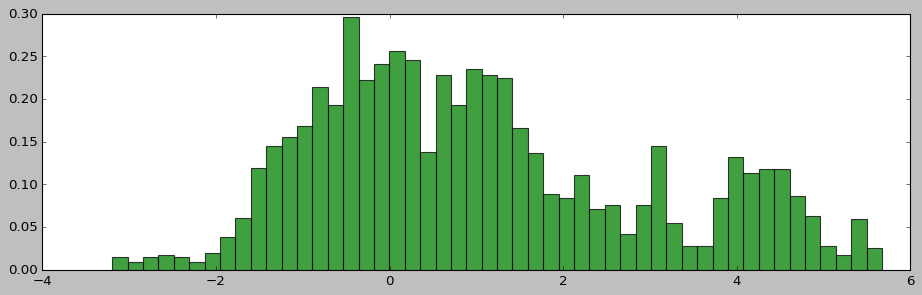

In [ ]:
plt.figure(figsize=(14,4))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

Organizando os dados

In [ ]:
dados.columns.values

array(['ano', 'meses', 'dia', 'fechamentoibov', 'aberturaibov', 'maxibov',
       'minibov', 'volibov', 'aberturausd', 'maxusd', 'minusd',
       'fechamentousd', 'volusd'], dtype=object)

In [ ]:
# para qualquer previsão futura se faz necessário usar a ordem dos dados especificada como critério de entrada
# para nosso estudo, vamos utilizar os dados de fechamento do dolar e analisar a sua possivel relação diaria com o indice ibov
entrada = ['fechamentousd']
# saida = ['fechamentoibov']  já que normalizamos os dados de fechamento, então esses não vão ser usados
valor_entrada = dados[entrada]
#valor_saida = dados[saida]
valor_saida = series
# já que normalizamos os dados

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)

Aplicando a árvore de decisão

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 2.4230579673500854 | Teste = 2.4327513330189716
Nivel 2 | Treino = 2.0779300616087157 | Teste = 2.1346575860456647
Nivel 3 | Treino = 1.8642775843397152 | Teste = 1.9882351733679013
Nivel 4 | Treino = 1.7131118080191772 | Teste = 1.9426649840862518
Nivel 5 | Treino = 1.634413774232187 | Teste = 2.012760386202419
Nivel 6 | Treino = 1.548276968726754 | Teste = 2.0559190771606723
Nivel 7 | Treino = 1.4584986715604633 | Teste = 2.133025548967085
Nivel 8 | Treino = 1.3514488788671521 | Teste = 2.261870740221874
Nivel 9 | Treino = 1.243242713307772 | Teste = 2.3952361915922173
Nivel 10 | Treino = 1.131580166377008 | Teste = 2.5043084162531266
Nivel 11 | Treino = 1.0121214070425688 | Teste = 2.637884113982369
Nivel 12 | Treino = 0.9031742769505596 | Teste = 2.7684657781337876
Nivel 13 | Treino = 0.8049238519933859 | Teste = 2.906175818860829
Nivel 14 | Treino = 0.7184678790518007 | Teste = 2.9844885974545994
Nivel 15 | Treino = 0.627179183231072 | Teste = 3.0499881726400266

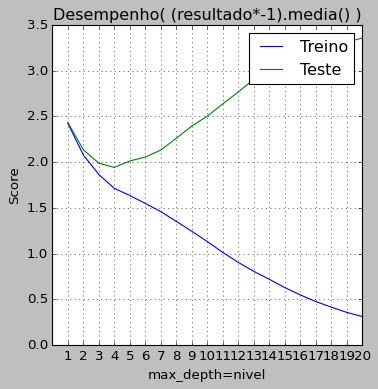

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( iteracoes, treino, 'b-', color='blue', label = 'Treino')
plt.plot( iteracoes, teste, 'b-', color='green', label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend()
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=4) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 1.4424388783854938 - 2.267406815980266


NSE = 0.49100150271809984
MAE = 0.9176609089454768


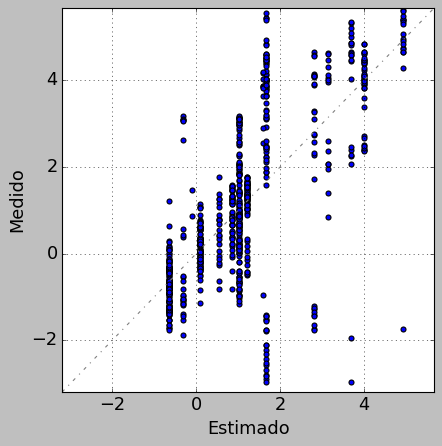

In [ ]:
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(6,6))
plt.scatter(predicoes, y_teste)
plt.plot([Min,Max],[Min,Max],'-.', c = 'gray')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks(fontsize = 16)
plt.xlabel("Estimado", fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Medido", fontsize = 16)
plt.grid(True)
def NSE(Yobs, Ysim):
  Yobs_m = np.mean(Yobs)
  s = np.sum((Yobs - Ysim)**2)
  i = np.sum((Yobs - Yobs_m)**2)
  return 1 - s/i
print('NSE =',NSE(y_teste, predicoes))
print('MAE =', tf.keras.metrics.mean_absolute_error(y_teste, predicoes).numpy())